# Classification with DecisionTree in WDE

In [1]:
#WDE dataset
WDE_path="C:/Users/aliba/OneDrive/Desktop/UNIVERSITA/TESI/DATASET/WalkingDistanceEstimation-master/dataset/"
classi=['armhand', 'pocket', 'calling', 'swing', 'handheld']
n_elem=500

import numpy as np
import matplotlib.pyplot as plt

#model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
#regression
from sklearn import linear_model
#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


#visualization
from yellowbrick.classifier import ConfusionMatrix
#from yellowbrick.classifier import ClassificationReport



from ipynb.fs.full.functioncollection import importWDE, filtWDE, f_ext_WDE,makeeqWDE,classification_dataset,is_in_range, random_list_range,SLE_buttfilter, del_outliers, feature_extraction


## Import all WDE

In [2]:
DATASET=importWDE()

PDR_Raw_2019-03-20-09-10-12 {'armhand': 0, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 288}
Outliers eliminati	 {'armhand': 0, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 12} 

PDR_Raw_2019-03-20-09-21-02 {'armhand': 0, 'pocket': 0, 'calling': 284, 'swing': 0, 'handheld': 0}
Outliers eliminati	 {'armhand': 0, 'pocket': 0, 'calling': 15, 'swing': 0, 'handheld': 0} 

PDR_Raw_2019-03-20-09-29-55 {'armhand': 0, 'pocket': 0, 'calling': 34, 'swing': 0, 'handheld': 45}
Outliers eliminati	 {'armhand': 0, 'pocket': 0, 'calling': 3, 'swing': 0, 'handheld': 1} 

PDR_Raw_2019-03-21-08-32-39 {'armhand': 196, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0}
Outliers eliminati	 {'armhand': 26, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0} 

PDR_Raw_2019-03-21-09-07-51 {'armhand': 527, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0}
Outliers eliminati	 {'armhand': 203, 'pocket': 0, 'calling': 0, 'swing': 0, 'handheld': 0} 

PDR_Raw_2019-03-21-11-57-56 {'armhand': 0, 'p

In [3]:
filtWDE(DATASET);

Filtering:##########
Done!



Struttura di DATASET:

In [4]:
print(type(DATASET))
for c,v in DATASET.items():
    print(c,type(v),len(v),type(v[0]),v[0].keys())

<class 'dict'>
armhand <class 'list'> 723 <class 'dict'> dict_keys(['target', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'SensorTimestamp'])
pocket <class 'list'> 685 <class 'dict'> dict_keys(['target', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'SensorTimestamp'])
calling <class 'list'> 764 <class 'dict'> dict_keys(['target', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'SensorTimestamp'])
swing <class 'list'> 1385 <class 'dict'> dict_keys(['target', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'SensorTimestamp'])
handheld <class 'list'> 5827 <class 'dict'> dict_keys(['target', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'SensorTimestamp'])


Estraiamo le Feature:

In [5]:
Feature_DS=f_ext_WDE(DATASET)


Extracting armhand:#########
Extracting pocket:#########
Extracting calling:#########
Extracting swing:#########
Extracting handheld:#########

In [6]:
for k,v in Feature_DS.items():
    print(k,type(v),v.keys(),len(v['feature']),len(v['feature'][0]),len(v['target']))
  

armhand <class 'dict'> dict_keys(['feature', 'target']) 723 92 723
pocket <class 'dict'> dict_keys(['feature', 'target']) 685 92 685
calling <class 'dict'> dict_keys(['feature', 'target']) 764 92 764
swing <class 'dict'> dict_keys(['feature', 'target']) 1385 92 1385
handheld <class 'dict'> dict_keys(['feature', 'target']) 5827 92 5827


Equilibriamo il dataset:

In [7]:
DS_train,DS_test = makeeqWDE(Feature_DS)

In [8]:
for k,v in DS_train.items():
    print(k,type(v),v.keys(),len(v['feature']),len(v['feature'][0]),len(v['target']))


armhand <class 'dict'> dict_keys(['feature', 'target']) 500 92 500
pocket <class 'dict'> dict_keys(['feature', 'target']) 500 92 500
calling <class 'dict'> dict_keys(['feature', 'target']) 500 92 500
swing <class 'dict'> dict_keys(['feature', 'target']) 500 92 500
handheld <class 'dict'> dict_keys(['feature', 'target']) 500 92 500


In [9]:
for k,v in DS_test.items():
    print(k,type(v),v.keys(),len(v['feature']),len(v['feature'][0]),len(v['target']))


armhand <class 'dict'> dict_keys(['feature', 'target']) 50 92 50
pocket <class 'dict'> dict_keys(['feature', 'target']) 50 92 50
calling <class 'dict'> dict_keys(['feature', 'target']) 50 92 50
swing <class 'dict'> dict_keys(['feature', 'target']) 50 92 50
handheld <class 'dict'> dict_keys(['feature', 'target']) 50 92 50


In [10]:
class_x_train,class_y_train,class_x_test,class_y_test = classification_dataset(DS_train,DS_test)

In [11]:
print(np.array(class_x_train).shape)
print(np.array(class_y_train).shape)


(2500, 92)
(2500,)


In [12]:
print(np.array(class_x_test).shape)
print(np.array(class_y_test).shape)

(250, 92)
(250,)


# <span style="color:red"> CLASSIFICATION WDE <span />

Nella cella sottostante viene testato il DecisionTree per {'min_samples_leaf':[1..20], 'min_samples_split': [1..40]}.<br />
La computazione di 8000 fit richiede in tutto 10 minuti circa, quindi clf.fit è commentato per non doverlo eseguire ogni volta, nel testo sottostante il risultato dei migliori parametri e l'accuracy ottenuta con gli stessi, creiamo quindi **best_dt** con i suddetti parametri.

In [ ]:
#decision tree è abbastanza insensibile allo scaling perché splitta sempre in base ad una sola feature

kf = KFold(n_splits=10, shuffle= True, random_state=0)#cv object

dtmodel=DecisionTreeClassifier(splitter="best")#max depth per ora lo lasciamo decidere al modello

params=[{"min_samples_split":[x+1 for x in range(1,40)],"min_samples_leaf":[x+1 for x in range(20)]}]

clf=GridSearchCV(dtmodel,param_grid= params, cv=kf,verbose=2,scoring="accuracy", return_train_score= True)
clf.fit(class_x_train, class_y_train)

In [13]:
print(clf.best_params_)
print("Accuracy:"+ str(clf.best_score_))

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END ............min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END ............min_samples_leaf=1, min

[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=1, min_samples_split=21; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=21; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=21; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=21; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=21; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=21; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=22; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=22; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=1, min_samples_split=31; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=31; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=31; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=31; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.0s
[CV] END ...........min_samples_leaf=1, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ............min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END ............min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END ............min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=12; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=13; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=13; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=2, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=22; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=22; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=22; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=22; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=23; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=23; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=2, min_samples_split=32; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=32; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=32; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.0s
[CV] END ...........min_samples_leaf=2, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END ............min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=13; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=14; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=14; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=3, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=23; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=3, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=33; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.1s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=3, min_samples_split=34; total time=   0.1s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=4, min_samples_split=3; total time=   0.1s
[CV] END ............min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.1s
[CV] END ............min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=14; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=15; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=24; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=4, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=34; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=34; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=34; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=4, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samples_leaf=4, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=5, min_samples_split=14; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=14; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=25; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=26; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.1s
[CV] END ...........min_samples_leaf=5, min_samples_split=35; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=5, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=6, min_samples_split=5; total time=   0.1s
[CV] END ............min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.1s
[CV] END ............min_samples_leaf=6, min_samples_split=6; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=15; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=26; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=27; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=27; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=36; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=37; total time=   0.1s
[CV] END ...........min_samples_leaf=6, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=6, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=7, min_samples_split=6; total time=   0.1s
[CV] END ............min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=7, min_samples_split=7; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=7, min_samples_split=16; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=16; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=16; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=17; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=7, min_samples_split=26; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=37; total time=   0.1s
[CV] END ...........min_samples_leaf=7, min_samples_split=38; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=38; total time=   0.0s
[CV] END ...........min_samples_leaf=7, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=8, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=8, min_samples_split=7; total time=   0.1s
[CV] END ............min_samples_leaf=8, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=8, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=8, min_samples_split=7; total time=   0.1s
[CV] END ............min_samples_leaf=8, min_samples_split=7; total time=   0.0s
[CV] END ............min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END ............min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END ............min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END ............min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=8, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=17; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=18; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=8, min_samples_split=27; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=27; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.0s
[CV] END ...........min_samples_leaf=8, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samples_leaf=8, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samp

[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.1s
[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=8; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=9; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=9; total time=   0.1s
[CV] END ............min_samples_leaf=9, min_samples_split=9; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=9; total time=   0.0s
[CV] END ............min_samples_leaf=9, min_samples_split=9; total time=   0.0s
[CV] END ............min_sam

[CV] END ...........min_samples_leaf=9, min_samples_split=18; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=18; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=19; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=9, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=28; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=28; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=29; total time=   0.1s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=9, min_samples_split=38; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.1s
[CV] END ...........min_samples_leaf=9, min_samples_split=39; total time=   0.0s
[CV] END ...........min_samples_leaf=9, min_samples_split=40; total time=   0.0s
[CV] END ...........min_samp

[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.0s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=10, min_samples_split=9; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=10, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=10, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=29; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=29; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=30; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=10, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.1s
[CV] END ..........min_samples_leaf=10, min_samples_split=40; total time=   0.0s
[CV] END ...........min_samples_leaf=11, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=10; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=11; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=11; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=11; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=11, min_samples_split=20; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=20; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=20; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=20; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=20; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=21; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=11, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.1s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.0s
[CV] END ..........min_samples_leaf=11, min_samples_split=31; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=1; total time=   0.0s
[CV] END ...........min_samples_leaf=12, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=12, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=11; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=12; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=12; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=12; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=12; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=12, min_samples_split=21; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=21; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=21; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=22; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=12, min_samples_split=31; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=31; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=31; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.1s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=12, min_samples_split=32; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=2; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=3; total time=   0.1s
[CV] END ...........min_samples_leaf=13, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=12; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=13; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=13; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=13, min_samples_split=22; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=22; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=22; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=22; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=22; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=23; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=13, min_samples_split=32; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=32; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.1s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_samples_leaf=13, min_samples_split=33; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.1s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.1s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.1s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=3; total time=   0.1s
[CV] END ...........min_samples_leaf=14, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=14, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=13; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=14; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=14, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=23; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=23; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=23; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=23; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=23; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=24; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=24; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=24; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=14, min_samples_split=33; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=33; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=33; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=33; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.1s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=14, min_samples_split=34; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=15, min_samples_split=3; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=3; total time=   0.1s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.1s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.1s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.1s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=15, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.1s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.1s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=15; total time=   0.1s
[CV] END ..........min_samples_leaf=15, min_samples_split=15; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.1s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=24; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=25; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=15, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=34; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=35; total time=   0.1s
[CV] END ..........min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=15, min_samples_split=35; total time=   0.1s
[CV] END ..........min_samples_leaf=15, min_samples_split=35; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=16, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=4; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=4; total time=   0.1s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.1s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.1s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=16, min_samples_split=5; total time=   0.1s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=16, min_samples_split=14; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=16; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=25; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=26; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=26; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=26; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=16, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=35; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=35; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=35; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=36; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=36; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=36; total time=   0.0s
[CV] END ..........min_samples_leaf=16, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=16, min_samples_split=36; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=17, min_samples_split=5; total time=   0.1s
[CV] END ...........min_samples_leaf=17, min_samples_split=5; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=5; total time=   0.1s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.1s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=17, min_samples_split=6; total time=   0.1s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=17, min_samples_split=15; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=17; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=26; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=27; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=17, min_samples_split=27; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=17, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=36; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=17, min_samples_split=37; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=18, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=6; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=6; total time=   0.1s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.1s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.1s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=18, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=18, min_samples_split=16; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=16; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=17; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=27; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=18, min_samples_split=28; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=37; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=38; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=38; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=38; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=38; total time=   0.1s
[CV] END ..........min_samples_leaf=18, min_samples_split=38; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=19, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=7; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samples_leaf=19, min_samples_split=8; total time=   0.0s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=19, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=17; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.1s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.1s
[CV] END ..........min_samples_leaf=19, min_samples_split=18; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.1s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=28; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=29; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=38; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=19, min_samples_split=39; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ...........min_samples_leaf=20, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=8; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samples_leaf=20, min_samples_split=9; total time=   0.1s
[CV] END ...........min_samp

[CV] END ..........min_samples_leaf=20, min_samples_split=18; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=18; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=18; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=19; total time=   0.1s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=29; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=30; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=30; total time=   0.0s
[CV] END ..........min_sampl

[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=39; total time=   0.1s
[CV] END ..........min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END ..........min_samples_leaf=20, min_samples_split=40; total time=   0.0s
[CV] END ..........min_sampl

C:\Users\aliba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

{'min_samples_leaf': 1, 'min_samples_split': 37}
Accuracy:0.9963999999999998


In [14]:
#utilizziamo i best parameters e vediamo i risultati
best_dt=DecisionTreeClassifier(splitter="best",min_samples_leaf= 2, min_samples_split=30)#.fit(F_x_eqWDE, eq_mode_list)

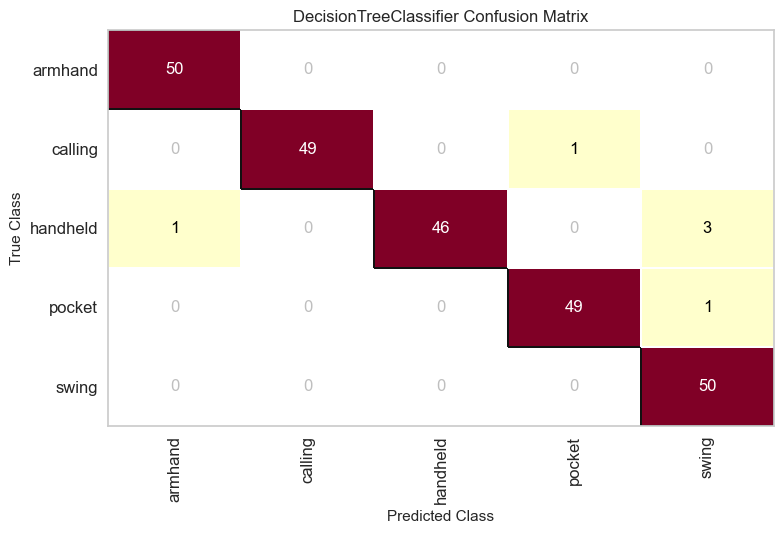

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
#Confusion matrix, 85 stride per ogni label
cm=ConfusionMatrix(clf.best_estimator_)
cm.fit(class_x_train, class_y_train)
cm.score(class_x_test, class_y_test)
cm.show()

In [16]:
#Classification report del best_dt
y_pred=clf.best_estimator_.predict(class_x_test)
print(print(classification_report(class_y_test, y_pred)))


              precision    recall  f1-score   support

     armhand       0.98      1.00      0.99        50
     calling       1.00      0.98      0.99        50
    handheld       1.00      0.92      0.96        50
      pocket       0.98      0.98      0.98        50
       swing       0.93      1.00      0.96        50

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

None
